In [1]:
from firedrake import *
from pyroteus import *
from pyroteus_adjoint import *
import matplotlib.pyplot as plt
from movement import *
%matplotlib inline

firedrake:WARNING OMP_NUM_THREADS is not set or is set to a value greater than 1, we suggest setting OMP_NUM_THREADS=1 to improve performance


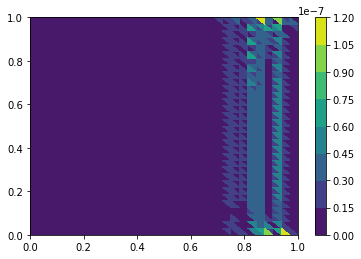

In [44]:
arr = np.fromfile("temp_arr")
n = 32
mesh = UnitSquareMesh(n, n, diagonal="left")
P0 = FunctionSpace(mesh, "DG", 0)
P1_vec = VectorFunctionSpace(mesh, "CG", 1)
P1_ten = TensorFunctionSpace(mesh, "CG", 1)
small_mesh = UnitSquareMesh(n//2, n//2, diagonal="left")
P0_small = FunctionSpace(small_mesh, "DG", 0)

m = Function(P0, val=arr)
tc = tricontourf(m)
plt.colorbar(tc)

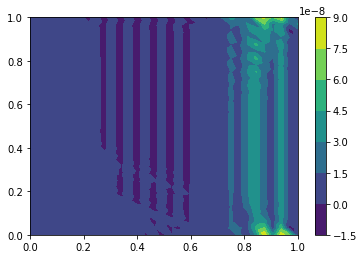

In [3]:
P1 = FunctionSpace(mesh, "CG", 1)
m_P1 = Function(P1)
m_P1.project(m)
tc = tricontourf(m_P1)
plt.colorbar(tc)
# Let's try smoothing it? we don't exactly want negative values either

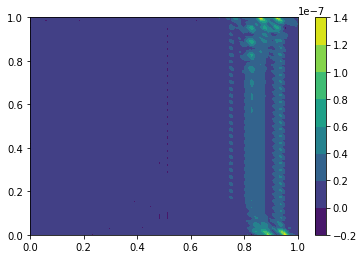

In [4]:
P2 = FunctionSpace(mesh, "CG", 2)
m_P2 = Function(P2)
m_P2.project(m)
tc = tricontourf(m_P2)
plt.colorbar(tc)

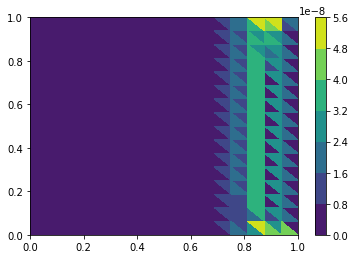

In [45]:
small_monitor = Function(P0_small)
small_monitor.project(m)
tc = tricontourf(small_monitor)
plt.colorbar(tc)

In [14]:
dt = 0.03125
dx = 0.001
N = 1
K = Constant(N * dx**2 / dt)
v = TestFunction(m_P2.function_space())
smooth_P2 = Function(m_P2.function_space())
n = FacetNormal(mesh)
# print(type(K * inner(grad(smooth_P2), grad(v)) * dx))
a = inner((smooth_P2 - m_P2) / dt, v) * dx
L = - K * inner(div(grad(m_P2)), v) * dx
bcs = []
print(type(F))
solve(a == L, smooth_P2, bcs=bcs)
tc = tricontourf(smooth_P1)
plt.colorbar(tc)

NameError: name 'F' is not defined

In [24]:
print(type(Constant(0.0) + 1))
print(type(ufl.algebra.Sum(m_P2, 0)))

def monitor(mesh):
    x, y = SpatialCoordinate(mesh)
    # Create UFL sum and return it?
    return (Constant(0.0) + Sum(m_P2.at((x, y))))
print(type(monitor(small_mesh)))

<class 'ufl.algebra.Sum'>
<class 'firedrake.function.Function'>


NameError: name 'Sum' is not defined

In [64]:
def ring_monitor(mesh):
    alpha = Constant(20.0)  # amplitude
    beta = Constant(200.0)  # width
    gamma = Constant(0.15)  # radius
    x, y = SpatialCoordinate(mesh)
    r = (x - 0.5)**2 + (y - 0.5)**2
    print(type(Constant(1.0) + alpha/cosh(beta*(r - gamma))**2))
    return Constant(1.0) + alpha/cosh(beta*(r - gamma))**2

# def temp_monitor(mesh):
#     return Function(P0, val=m.dat.data)

def dummy(mesh):
    P0 = FunctionSpace(mesh, "DG", 0)
    m_small = Function(P0)
    m_small.project(m)
    return m_small

mover = MongeAmpereMover(small_mesh, dummy, method="quasi_newton", maxiter=10)

In [65]:
mover.move();

   0   Min/Max 6.8756e-13   Residual 1.5793e+00   Equidistribution 1.0000e+00
Converged in 0 iterations.


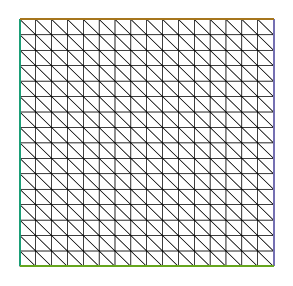

In [66]:
def plot_mesh(mesh, fig=None, axes=None, **kwargs):
    kwargs.setdefault("interior_kw", {"linewidth": 0.5})
    kwargs.setdefault("boundary_kw", {"linewidth": 2.0})
    if fig is None and axes is None:
        fig, axes = plt.subplots(figsize=(5, 5))
    tp = triplot(mesh, axes=axes, **kwargs)
    axes.axis(False)
    return fig, axes, tp
plot_mesh(mover.mesh);

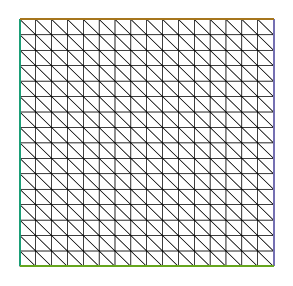

In [67]:
plot_mesh(small_mesh);

True
